In [1]:
from glob import glob
import pickle

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
file_list = glob('data7/*')

In [4]:
all_data_dicts = {
    'S':[],
    'M':[],
    'L':[],
    'X':[]
}

for filename in file_list:
    with open(filename, 'rb') as handle:
        this_dict = pickle.load(handle)
        this_dict['t']=int(filename[-8])
        all_data_dicts[filename[12]].append(this_dict)




In [5]:
all_data_dicts

{'S': [{'sig_ratio': 0.055, 'dimension': 1, 'result': [[1, 1]], 't': 5},
  {'sig_ratio': 0.02, 'dimension': 1, 'result': [[1, -1]], 't': 3},
  {'sig_ratio': 0.065, 'dimension': 1, 'result': [[1, 2]], 't': 6},
  {'sig_ratio': 0.1, 'dimension': 18, 'result': [[18, 0]], 't': 6},
  {'sig_ratio': 0.01, 'dimension': 1, 'result': [[1, -1]], 't': 0},
  {'sig_ratio': 0.005, 'dimension': 1, 'result': [[1, -1]], 't': 0},
  {'sig_ratio': 0.1, 'dimension': 10, 'result': [[10, 1]], 't': 5},
  {'sig_ratio': 0.035, 'dimension': 1, 'result': [[1, -1]], 't': 3},
  {'sig_ratio': 0.085, 'dimension': 4, 'result': [[4, -1]], 't': 5},
  {'sig_ratio': 0.08, 'dimension': 2, 'result': [[2, -1]], 't': 6},
  {'sig_ratio': 0.07, 'dimension': 2, 'result': [[2, 2]], 't': 7},
  {'sig_ratio': 0.09, 'dimension': 8, 'result': [[8, 0]], 't': 7},
  {'sig_ratio': 0.07, 'dimension': 1, 'result': [[1, -1]], 't': 5},
  {'sig_ratio': 0.035, 'dimension': 6, 'result': [[6, -1]], 't': 2},
  {'sig_ratio': 0.065, 'dimension': 10, '

In [6]:
def make_dict(key):
    numbers_S = {}

    for event in all_data_dicts[key]:
        sig_ratio, dim, t = event['sig_ratio'], event['dimension'], event['t']
        if sig_ratio not in numbers_S:
            numbers_S[sig_ratio] = [0 for _ in range(10)]
        numbers_S[sig_ratio][t] = max(dim, numbers_S[sig_ratio][t])
        
    # out = {key:sum(val)/10 for key, val in numbers_S.items()}
    return numbers_S



In [7]:
numbers_S = make_dict('S')

In [8]:
numbers_M = make_dict('M')
numbers_L = make_dict('L')
numbers_XS = make_dict('X')

In [9]:
def sort_dict(d):
    return dict(sorted(d.items()))

In [10]:
numbers_S = sort_dict(numbers_S)
numbers_M = sort_dict(numbers_M)
numbers_L = sort_dict(numbers_L)
numbers_XS = sort_dict(numbers_XS)

In [11]:
numbers_S

{0.005: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 0.01: [4, 4, 2, 4, 2, 4, 1, 1, 1, 1],
 0.015: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 0.02: [1, 1, 1, 1, 1, 2, 1, 1, 1, 1],
 0.025: [2, 1, 1, 1, 1, 2, 2, 1, 1, 1],
 0.03: [1, 2, 1, 1, 1, 1, 1, 1, 1, 1],
 0.035: [8, 4, 6, 2, 6, 2, 8, 4, 6, 1],
 0.04: [4, 4, 4, 4, 4, 4, 4, 6, 10, 10],
 0.045: [2, 1, 2, 2, 1, 1, 1, 4, 2, 4],
 0.05: [12, 100, 100, 80, 100, 6, 12, 100, 30, 4],
 0.055: [50, 8, 2, 4, 8, 8, 4, 6, 6, 6],
 0.06: [35, 100, 30, 8, 25, 10, 14, 4, 8, 14],
 0.065: [20, 2, 6, 6, 18, 8, 100, 14, 20, 6],
 0.07: [14, 18, 100, 4, 100, 4, 12, 8, 6, 8],
 0.075: [4, 8, 6, 4, 8, 4, 4, 10, 100, 2],
 0.08: [100, 100, 18, 1, 6, 100, 2, 100, 1, 4],
 0.085: [100, 100, 100, 100, 100, 8, 100, 100, 100, 4],
 0.09: [100, 100, 16, 12, 100, 100, 100, 100, 100, 10],
 0.1: [8, 8, 100, 6, 100, 100, 100, 4, 4, 8]}

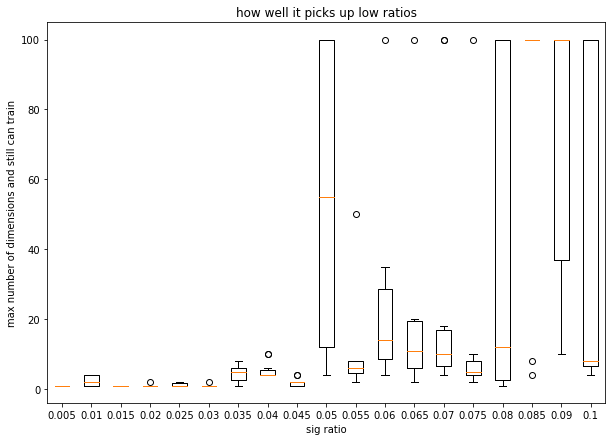

In [12]:
labels = []
data = []
for x, y in numbers_S.items():
    data.append(y)
    labels.append(x)
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data)
 
      
# x-axis labels
ax.set_xticklabels(labels)
 
# Adding title
ax.set_title('how well it picks up low ratios')
ax.set_xlabel('sig ratio')

ax.set_ylabel('max number of dimensions and still can train')
 
     
# show plot
plt.show()

In [13]:
def squish(dic):
    out = {key:sum(val)/len(val) for key, val in dic.items()}
    return out

export = {
    'S':squish(numbers_S),
    'M':squish(numbers_M),
    'L':squish(numbers_L),
    'XS':squish(numbers_XS)
}

export

{'S': {0.005: 1.0,
  0.01: 2.4,
  0.015: 1.0,
  0.02: 1.1,
  0.025: 1.3,
  0.03: 1.1,
  0.035: 4.7,
  0.04: 5.4,
  0.045: 2.0,
  0.05: 54.4,
  0.055: 10.2,
  0.06: 24.8,
  0.065: 20.0,
  0.07: 27.4,
  0.075: 15.0,
  0.08: 43.2,
  0.085: 81.2,
  0.09: 73.8,
  0.1: 43.8},
 'M': {0.005: 1.2,
  0.01: 1.2,
  0.015: 1.1,
  0.02: 1.0,
  0.025: 1.0,
  0.03: 1.2,
  0.035: 1.0,
  0.04: 1.5,
  0.045: 1.1,
  0.05: 3.3,
  0.055: 2.2,
  0.06: 5.4,
  0.065: 1.8,
  0.07: 4.2,
  0.075: 1.4,
  0.08: 1.8,
  0.085: 3.1,
  0.09: 4.4,
  0.1: 6.6},
 'L': {0.005: 1.0,
  0.01: 1.1,
  0.015: 1.0,
  0.02: 1.0,
  0.025: 1.1,
  0.03: 1.0,
  0.035: 1.1,
  0.04: 1.1,
  0.045: 1.0,
  0.05: 1.4,
  0.055: 1.1,
  0.06: 1.6,
  0.065: 1.3,
  0.07: 1.0,
  0.075: 2.1,
  0.08: 2.0,
  0.085: 2.5,
  0.09: 12.5,
  0.1: 3.6},
 'XS': {0.005: 2.0,
  0.01: 3.2,
  0.015: 1.4,
  0.02: 4.2,
  0.025: 2.4,
  0.03: 6.3,
  0.035: 1.0,
  0.04: 3.6,
  0.045: 6.7,
  0.05: 7.4,
  0.055: 7.8,
  0.06: 23.1,
  0.065: 20.6,
  0.07: 14.5,
  0.075:

In [14]:
with open('data_export/main_no_box/res7.pickle', 'wb') as handle:
    pickle.dump(export, handle, protocol=pickle.HIGHEST_PROTOCOL)
